In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

from datetime import datetime, timedelta

plt.style.use('ggplot')

In [5]:
# Путь до папки с данными
path_to_data = 'datasets/'

In [6]:
data = pd.read_csv(path_to_data + 'meteo/4403131.csv', ';', index_col = 'time')
data.columns

Index(['station_name', 'station_id', 'visibility_distance',
       'visibility_distance_quality', 'wind_direction',
       'wind_direction_quality', 'wind_speed_avg', 'wind_speed_avg_quality',
       'wind_speed_sign', 'wind_speed_max', 'wind_speed_max_quality',
       'wind_speed_max_sign', 'precipitation_amount',
       'precipitation_amount_quality', 'temperature_ground',
       'temperature_ground_quality', 'temperature_air',
       'temperature_air_quality', 'humidity', 'humidity_quality'],
      dtype='object')

In [8]:
data = data.sort_values(by=['station_id','time'])
data

station_name  station_id  visibility_distance  \
time                                                                
1987-02-01 00:00:00      POLTA26     4403131                 83.0   
1987-02-01 03:00:00      POLTA26     4403131                 99.0   
1987-02-01 06:00:00      POLTA26     4403131                 99.0   
1987-02-01 09:00:00      POLTA26     4403131                 99.0   
1987-02-01 12:00:00      POLTA26     4403131                 99.0   
...                          ...         ...                  ...   
2018-12-31 09:00:00      POLTA26     4403131                  NaN   
2018-12-31 12:00:00      POLTA26     4403131                  NaN   
2018-12-31 15:00:00      POLTA26     4403131                  NaN   
2018-12-31 18:00:00      POLTA26     4403131                  NaN   
2018-12-31 21:00:00      POLTA26     4403131                  NaN   

                     visibility_distance_quality  wind_direction  \
time                                                               
1987-02-01 00:00:00                            0           230.0   
1987-02-01 03:00:00                            0           230.0   
1987-02-01 06:00:00                            0           280.0   
1987-02-01 09:00:00                            0            20.0   
1987-02-01 12:00:00                            0           110.0   
...                                          ...             ...   
2018-12-31 09:00:00                            5           280.0   
2018-12-31 12:00:00                            7             NaN   
2018-12-31 15:00:00                            5             0.0   
2018-12-31 18:00:00                            7             NaN   
2018-12-31 21:00:00                            5             0.0   

                     wind_direction_quality  wind_speed_avg  \
time                                                          
1987-02-01 00:00:00                       0             4.0   
1987-02-01 03:00:00                       0             1.0   
1987-02-01 06:00:00                       0             2.0   
1987-02-01 09:00:00                       0             1.0   
1987-02-01 12:00:00                       0             3.0   
...                                     ...             ...   
2018-12-31 09:00:00                       0             2.0   
2018-12-31 12:00:00                       7             NaN   
2018-12-31 15:00:00                       0             0.0   
2018-12-31 18:00:00                       7             NaN   
2018-12-31 21:00:00                       0             0.0   

                     wind_speed_avg_quality  wind_speed_sign  wind_speed_max  \
time                                                                           
1987-02-01 00:00:00                       0              NaN             8.0   
1987-02-01 03:00:00                       0              NaN             3.0   
1987-02-01 06:00:00                       0              NaN             5.0   
1987-02-01 09:00:00                       0              NaN             3.0   
1987-02-01 12:00:00                       0              NaN             8.0   
...                                     ...              ...             ...   
2018-12-31 09:00:00                       0              NaN             7.0   
2018-12-31 12:00:00                       7              NaN             NaN   
2018-12-31 15:00:00                       0              NaN             3.0   
2018-12-31 18:00:00                       7              NaN             NaN   
2018-12-31 21:00:00                       0              NaN             3.0   

                     wind_speed_max_quality  wind_speed_max_sign  \
time                                                               
1987-02-01 00:00:00                       0                  NaN   
1987-02-01 03:00:00                       0                  NaN   
1987-02-01 06:00:00                       0                  NaN   
1987-02-01 09:00:00                 

Helpers

In [9]:
df = data.copy()

In [27]:
def nse(simulations, evaluation):
    nse = 1 - (np.sum((evaluation - simulations) ** 2, axis=0, dtype=np.float64)
        / np.sum((evaluation - np.mean(evaluation)) ** 2, dtype=np.float64))
    return nse

In [28]:
def na_heat_map(df, figsize=(20,12), cmap='viridis'):
    fig, ax = plt.subplots(figsize=figsize)
    sns_heatmap = sns.heatmap(df.isna(), yticklabels = False, cbar = False, cmap = cmap)

In [31]:
def interpolate_df(df, method = 'time', cols = []):
    if len(cols) == 0:
        return df.interpolate(method = method)
    else:
        res = df.copy()
        res[cols] =  res[cols].interpolate(method = method)
        return res

In [93]:
def plot_time_series(df, grouping_field, gf_vals, cols, start_date, end_date):
    _df = df.copy()
    if start_date != None and end_date != None:
        _df = _df.loc[start_date : end_date]
    elif start_date == None:
        _df = _df.loc[ : end_date]
    elif end_date == None:
        _df = _df.loc[start_date : ]
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20,10)) 
    print("KEK")
    for key, grp in _df[_df[grouping_field].isin(gf_vals)].loc[start_date:end_date].groupby(grouping_field): 
      
        for col in cols:
            ax.plot(grp.index, grp[col], label = key)

In [80]:
def plot_series(df, cols, start_date = None, end_date = None, figsize = (20,10), **plot_params):
    _df = df.copy()
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = figsize)
    if start_date != None and end_date != None:
        _df = _df.loc[start_date : end_date]
    elif start_date == None:
        _df = _df.loc[ : end_date]
    elif end_date == None:
        _df = _df.loc[start_date : ]
    
    for col in cols:
        ax.plot(_df.index, _df[col], *plot_params)

KEK


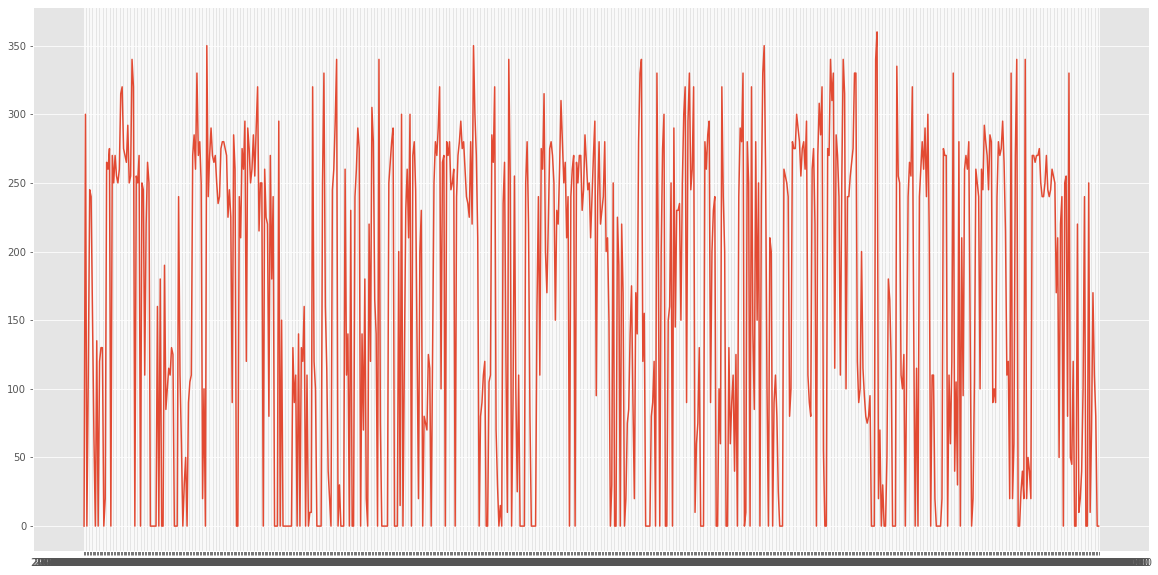

In [95]:
plot_time_series(df, 'station_id', ['4403131', '4403133'], ['wind_direction'], '2001-01-01', '2001-04-01')

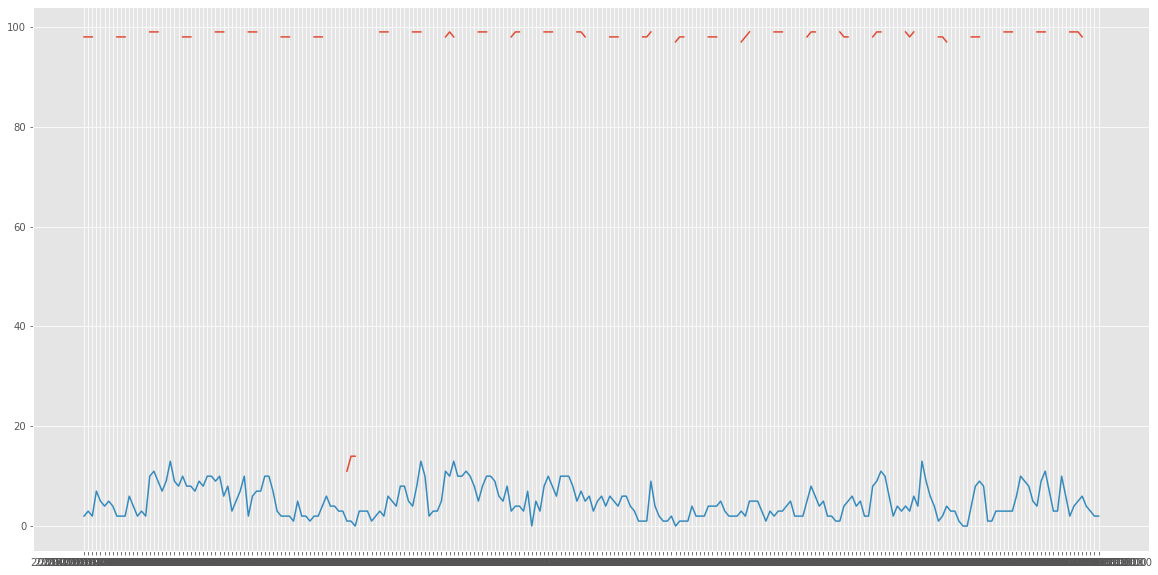

In [82]:
plot_series(df, ['visibility_distance', 'wind_speed_max'], '2001-01-01', '2001-02-01')

In [34]:
def agg

def get_acc_ice(data, year):
    return data['ice_thickness'][datetime(year=year - 1, month = 10, day = 1) : datetime(year=year, month = 5, day = 1)].sum()

def get_acc_snow(data, year):
    return data['snow_height'][datetime(year=year - 1, month = 10, day = 1) : datetime(year=year, month = 5, day = 1)].sum()

In [29]:
dd = pd.read_pickle(path_to_data + 'processed_data/disch_d.pkl')
dd.set_index('date')

consumption  station_id
date                               
1984-01-01       1300.0        5013
1984-01-02       1310.0        5013
1984-01-03       1320.0        5013
1984-01-04       1330.0        5013
1984-01-05       1320.0        5013
...                 ...         ...
NaT                 NaN        6574
NaT                 NaN        6574
NaT                 NaN        6574
NaT                 NaN        6574
NaT                 NaN        6574

[1362600 rows x 2 columns]

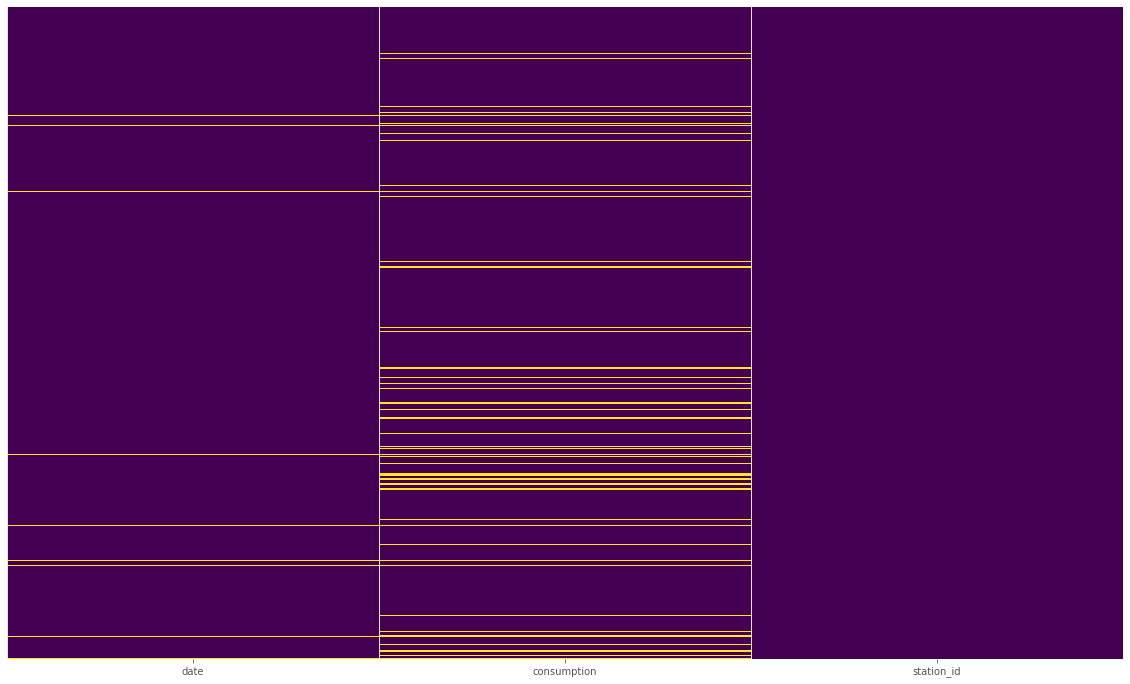

In [30]:
na_heat_map(dd)

<AxesSubplot:>

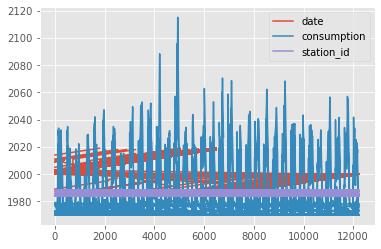

In [22]:
dd.plot()

In [ ]:
class RiverNodeModel:
    def __init__(df, post)

In [81]:
class TimeSeriesExtracter():
    def __init__(self, id_col, x_cols, deltas, lags):
        self.id_col = id_col
        self.x_cols = x_cols
        self.deltas = deltas
        self.lags = lags
        pass
    
    def fit(self, df, **fit_params):
        self.df = df.copy()
        return self
    
    def transform(self, **transform_params):
        for x, d, lag, in zip(self.x_cols, self.deltas, self.lags):
            for i in range(d, d + lag):
                self.df[x + "_t_" + str(i)] = self.df.groupby(self.id_col)[x].shift(i)
                
        return self.df
    
    def fit_transform(self, df):
        return self.fit(df).transform()

In [82]:
TimeSeriesExtracter('station_id', ['temperature_ground'], [1], [3]).fit_transform(df)

station_name  station_id  visibility_distance  \
time                                                                
1987-02-01 00:00:00      POLTA26     4403131                 83.0   
1987-02-01 03:00:00      POLTA26     4403131                 99.0   
1987-02-01 06:00:00      POLTA26     4403131                 99.0   
1987-02-01 09:00:00      POLTA26     4403131                 99.0   
1987-02-01 12:00:00      POLTA26     4403131                 99.0   
...                          ...         ...                  ...   
2018-12-31 09:00:00      POLTA26     4403131                  NaN   
2018-12-31 12:00:00      POLTA26     4403131                  NaN   
2018-12-31 15:00:00      POLTA26     4403131                  NaN   
2018-12-31 18:00:00      POLTA26     4403131                  NaN   
2018-12-31 21:00:00      POLTA26     4403131                  NaN   

                     visibility_distance_quality  wind_direction  \
time                                                               
1987-02-01 00:00:00                            0           230.0   
1987-02-01 03:00:00                            0           230.0   
1987-02-01 06:00:00                            0           280.0   
1987-02-01 09:00:00                            0            20.0   
1987-02-01 12:00:00                            0           110.0   
...                                          ...             ...   
2018-12-31 09:00:00                            5           280.0   
2018-12-31 12:00:00                            7             NaN   
2018-12-31 15:00:00                            5             0.0   
2018-12-31 18:00:00                            7             NaN   
2018-12-31 21:00:00                            5             0.0   

                     wind_direction_quality  wind_speed_avg  \
time                                                          
1987-02-01 00:00:00                       0             4.0   
1987-02-01 03:00:00                       0             1.0   
1987-02-01 06:00:00                       0             2.0   
1987-02-01 09:00:00                       0             1.0   
1987-02-01 12:00:00                       0             3.0   
...                                     ...             ...   
2018-12-31 09:00:00                       0             2.0   
2018-12-31 12:00:00                       7             NaN   
2018-12-31 15:00:00                       0             0.0   
2018-12-31 18:00:00                       7             NaN   
2018-12-31 21:00:00                       0             0.0   

                     wind_speed_avg_quality  wind_speed_sign  wind_speed_max  \
time                                                                           
1987-02-01 00:00:00                       0              NaN             8.0   
1987-02-01 03:00:00                       0              NaN             3.0   
1987-02-01 06:00:00                       0              NaN             5.0   
1987-02-01 09:00:00                       0              NaN             3.0   
1987-02-01 12:00:00                       0              NaN             8.0   
...                                     ...              ...             ...   
2018-12-31 09:00:00                       0              NaN             7.0   
2018-12-31 12:00:00                       7              NaN             NaN   
2018-12-31 15:00:00                       0              NaN             3.0   
2018-12-31 18:00:00                       7              NaN             NaN   
2018-12-31 21:00:00                       0              NaN             3.0   

                     ...  precipitation_amount_quality  temperature_ground  \
time                 ...                                                     
1987-02-01 00:00:00  ...                             5               -24.5   
1987-02-01 03:00:00  ...                             5               -24.0   
1987-02-01 06:00:00  ...                             5          

In [98]:
ice_data = pd.read_pickle(path_to_data + 'processed_data/ice.pkl')
ice_data = ice_data.set_index('date')
ice_data

ice_thickness  snow_height  place  station_id
date                                                     
1984-11-30           41.0          NaN      1        5001
1984-12-05           40.0          NaN      1        5001
1984-12-10           50.0          NaN      1        5001
1984-12-15           56.0          NaN      1        5001
1984-12-20           62.0          NaN      1        5001
...                   ...          ...    ...         ...
2017-12-10           18.0          NaN      1        6574
2017-12-15           19.0          6.0      1        6574
2017-12-20           24.0          7.0      1        6574
2017-12-25           35.0          8.0      1        6574
2017-12-31           39.0          9.0      1        6574

[128389 rows x 4 columns]

In [107]:
ice_df = ice_data[['ice_thickness', 'snow_height']]\
.shift(1)\
.resample('W')\
.agg({
    'ice_thickness': 'sum',
    'snow_height': 'sum'
})

In [108]:
ice_df['ice_thickness'].value_counts()

0.0        870
89.0         3
63.0         3
2007.0       2
780.0        2
          ... 
10663.0      1
6925.0       1
9859.0       1
4695.0       1
1500.0       1
Name: ice_thickness, Length: 918, dtype: int64